In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from datasets import load_dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


# Load Data

In [50]:
dataset_reviews = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
df_reviews = dataset_reviews["full"].to_pandas()

dataset_items = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
df_items = dataset_items.to_pandas()

# EDA

* we have 701528 reviews, 112590 items, 631986 unique users 



In [3]:
df_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [4]:
df_reviews.shape

(701528, 10)

In [5]:
df_items.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],None,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Howard Products,[],"{""Package Dimensions"": ""7.1 x 5.5 x 3 inches; ...",B01CUPMQZE,None,None,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Yes To,[],"{""Item Form"": ""Powder"", ""Skin Type"": ""Acne Pro...",B076WQZGPM,None,None,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],None,"{'hi_res': [None, None], 'large': ['https://m....","{'title': [], 'url': [], 'user_id': []}",Levine Health Products,[],"{""Manufacturer"": ""Levine Health Products""}",B000B658RI,None,None,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Cherioll,[],"{""Brand"": ""Cherioll"", ""Item Form"": ""Powder"", ""...",B088FKY3VD,None,None,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Precision,[],"{""UPC"": ""644287689178""}",B07NGFDN6G,None,None,None


In [6]:
df_items.shape

(112590, 16)

In [7]:
df = pd.merge(df_reviews, df_items, on='parent_asin', how='left', suffixes=('_review', '_item'))

In [8]:
df.head()

,rating,title_review,text,images_review,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_item,average_rating,rating_number,features,description,price,images_item,videos,store,categories,details,bought_together,subtitle,author
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,All Beauty,Herbivore - Natural Sea Mist Texturizing Salt ...,4.3,384,[],"[If given the choice, weÕd leave most telltale...",None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Best Hair Product For Summer!', 'O...",HERBIVORE,[],"{""Hair Type"": ""Wavy"", ""Material Type Free"": ""D...",None,None,None
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Easy to apply!'], 'url': ['https:/...",Two Goats Apothecary,[],"{""Brand"": ""Two Goats Apothecary"", ""Item Form"":...",None,None,None
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,All Beauty,New Road Beauty - Creamsicle - Variety 3 Pack ...,4.4,699,"[Same Great Product, NEW PACKAGING., MOISTURIZ...",[New Road Beauty Paraffin Wax is recommended f...,21.98,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Opening the Creamsicle assortment ...,New Road Beauty,[],"{""Package Dimensions"": ""10.5 x 6.4 x 1.6 inche...",None,None,None
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,All Beauty,muaowig Ombre Body Wave Bundles 1B Grey Human ...,1.0,1,[?Hair Bundle Material?:Brazilian Virgin Human...,[Hair Material: Brazilian Virgin Human Hair Bu...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",muaowig,[],"{""Brand"": ""muaowig"", ""Material"": ""Human Hair"",...",None,None,None
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,All Beauty,Yinhua Electric Nail Drill Kit Portable Profes...,3.5,20,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Yinhua,[],"{""Package Dimensions"": ""8.5 x 3.82 x 2.24 inch...",None,None,None


## Datset insights

* Most reviews are of 5 starts
* 75% of users have only 1 review.


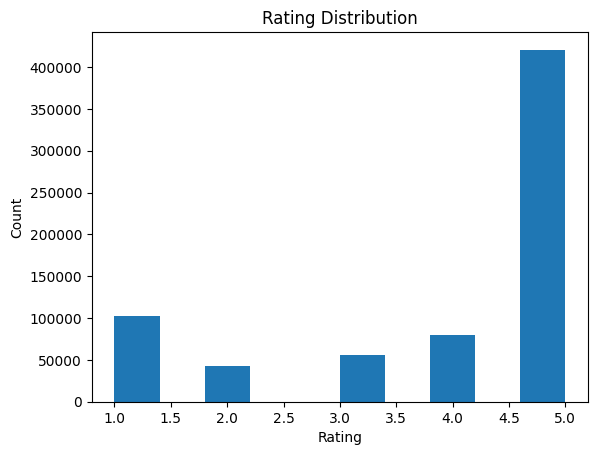

In [10]:
df['rating'].hist(bins=10, grid=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

count    701528.000000
mean          1.621113
std           5.096772
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         165.000000
Name: num_reviews_per_user, dtype: float64


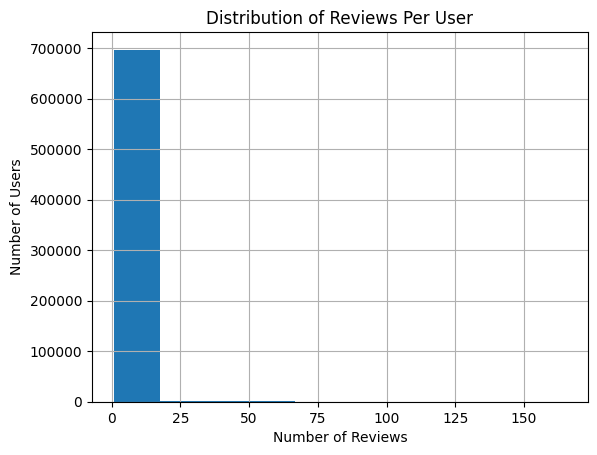

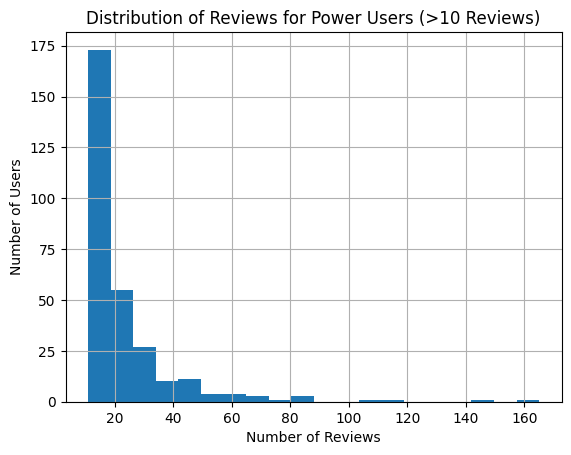

In [11]:
reviews_per_user = df.groupby('user_id').size()
df['num_reviews_per_user'] = df['user_id'].map(reviews_per_user)

print(df['num_reviews_per_user'].describe())

df['num_reviews_per_user'].hist()
plt.title('Distribution of Reviews Per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()

# look into users that have more reviews
power_users = reviews_per_user[reviews_per_user > 10]

power_users.hist(bins=20)
plt.title('Distribution of Reviews for Power Users (>10 Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()

In [12]:
# Rating Statistics per User

In [19]:
df['user_mean_rating'] = df.groupby('user_id')['rating'].transform('mean')
df['user_min_rating'] = df.groupby('user_id')['rating'].transform('min')
df['user_max_rating'] = df.groupby('user_id')['rating'].transform('max')

In [20]:
df[['user_mean_rating', 'user_min_rating', 'user_max_rating']].describe()

,user_mean_rating,user_min_rating,user_max_rating
count,701528.000000,701528.000000,701528.000000
mean,3.960245,3.843760,4.050973
std,1.452429,1.542628,1.457485
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


In [21]:
# most users rate highly 

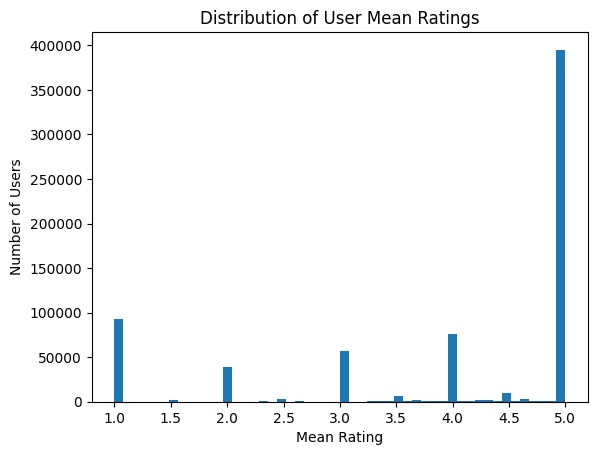

In [22]:
df['user_mean_rating'].hist(bins=50, grid=False)
plt.title('Distribution of User Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Number of Users')
plt.show()

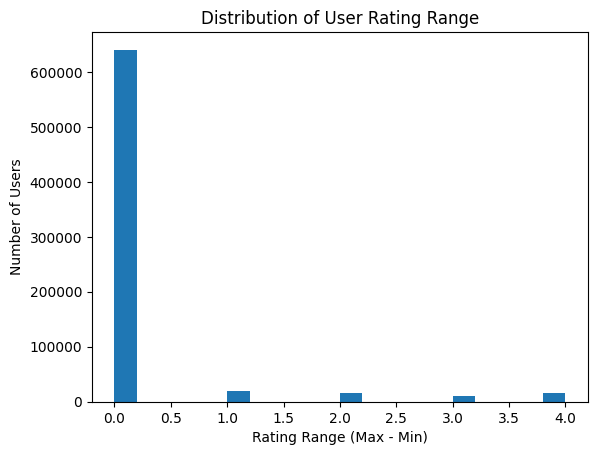

In [23]:
# most users tend to rate similarly
df['user_rating_range'] = df['user_max_rating'] - df['user_min_rating']

# Plot distribution of rating range
df['user_rating_range'].hist(bins=20, grid=False)
plt.title('Distribution of User Rating Range')
plt.xlabel('Rating Range (Max - Min)')
plt.ylabel('Number of Users')
plt.show()


* casual users rate in a more polarized manner and show less variability in their ratings. Have a positive bias (mostly 5 stars).
* power users have a broader distribution of means of ratings, and they have fewer extreme ratings. This shows a more nuanced approach.

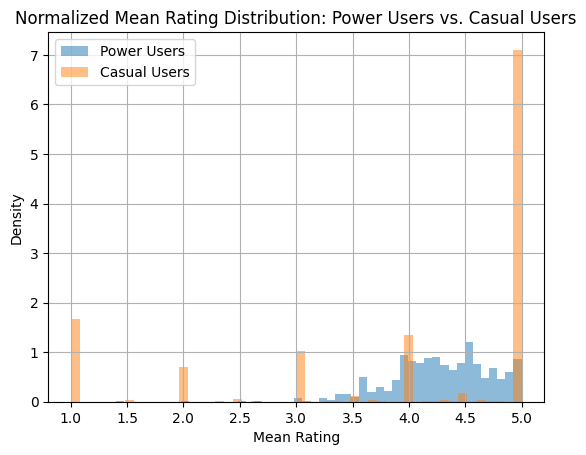

In [25]:
df[df.num_reviews_per_user >= 10]['user_mean_rating'].hist(alpha=0.5, label='Power Users', bins=50, density=True)
df[df.num_reviews_per_user < 10]['user_mean_rating'].hist(alpha=0.5, label='Casual Users', bins=50, density=True)
plt.title('Normalized Mean Rating Distribution: Power Users vs. Casual Users')
plt.xlabel('Mean Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

* mostly users who rate positively, with very few rating critically or neutrally
* since most users tend to give high ratings, distinguishing genuinely high-quality products might require focusing on other metrics 

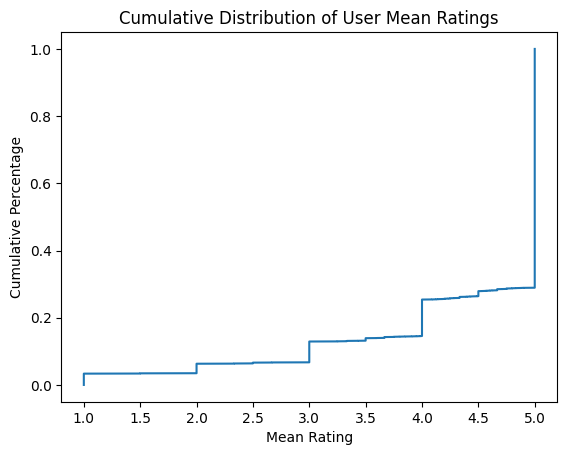

In [26]:
# Calculate cumulative distribution
sorted_ratings = df['user_mean_rating'].sort_values()
cumulative = sorted_ratings.cumsum() / sorted_ratings.sum()

# Plot cumulative distribution
plt.plot(sorted_ratings, cumulative)
plt.title('Cumulative Distribution of User Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Cumulative Percentage')
plt.show()

In [29]:
# only a small percentage is premium beauty
df.main_category.value_counts(normalize=True)

main_category
All Beauty        0.989791
Premium Beauty    0.010209
Name: proportion, dtype: float64

<Axes: xlabel='main_category'>

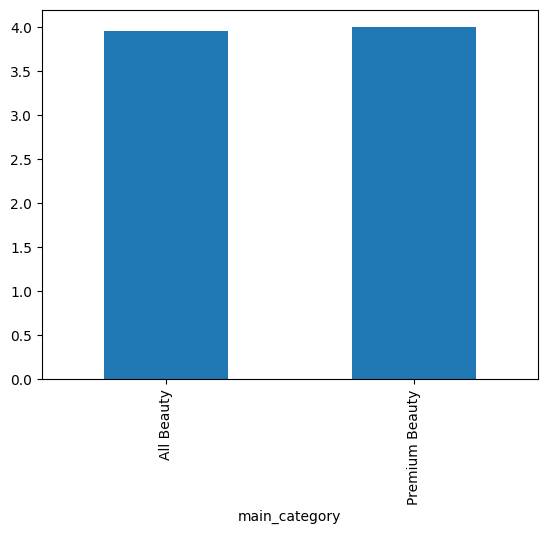

In [37]:
df.groupby('main_category')['rating'].mean().plot(kind='bar')

<Axes: xlabel='timestamp'>

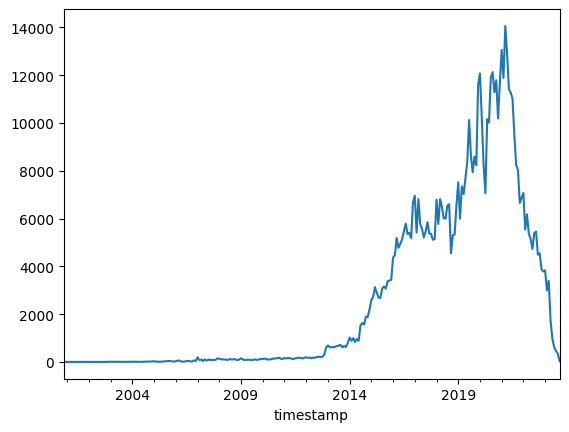

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['timestamp'].dt.to_period('M').value_counts().sort_index().plot()

# Clustering

In [44]:
user_features = df[['user_mean_rating', 'user_rating_range', 'num_reviews_per_user']].drop_duplicates()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_features)

kmeans = KMeans(n_clusters=3, random_state=42)
user_features['cluster'] = kmeans.fit_predict(scaled_features)



* Three clusters discovered:

    * yellow: low to moderate reviews, casual users (low ammount of reviews)
    
    * purple: all power users are here, some causal, moderate and high mean ratings, seem like balanced raters
    
    * teal: consistent higher ratings, lower rating range (higher ratings), mostly casual users, some power users


Purple cluster seems the most interesting for a recommender system since they seem to have less bias

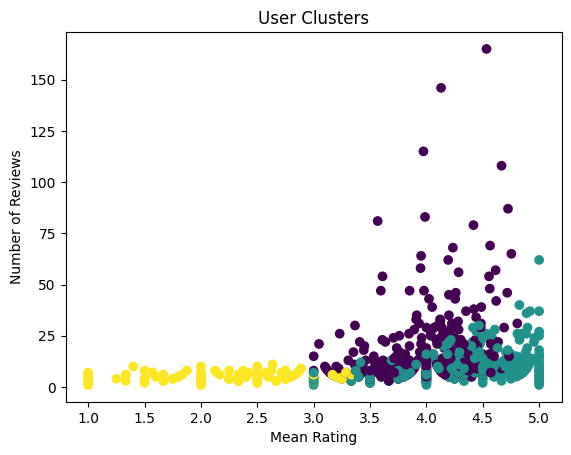

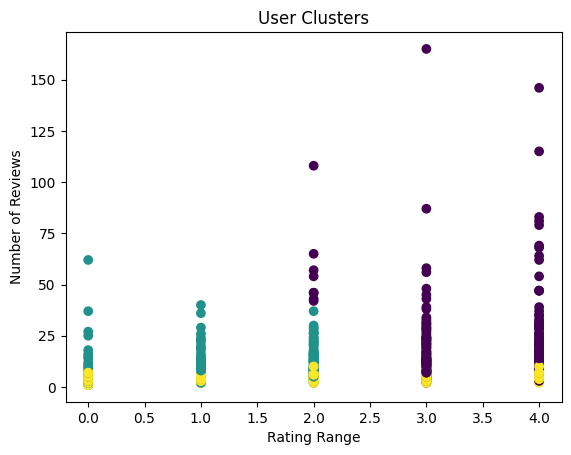

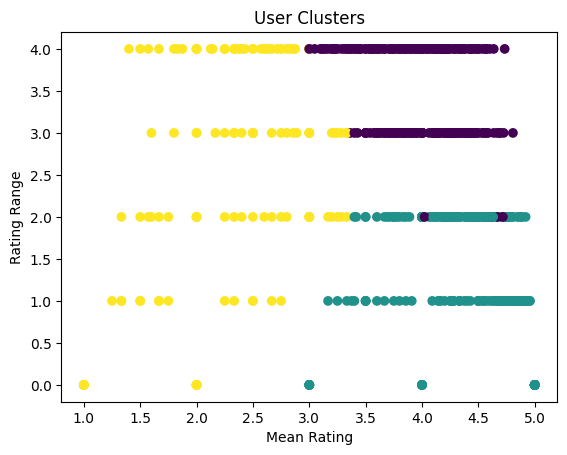

In [48]:
plt.scatter(user_features['user_mean_rating'], user_features['num_reviews_per_user'], c=user_features['cluster'])
plt.xlabel('Mean Rating')
plt.ylabel('Number of Reviews')
plt.title('User Clusters')
plt.show()

plt.scatter(user_features['user_rating_range'], user_features['num_reviews_per_user'], c=user_features['cluster'])
plt.xlabel('Rating Range')
plt.ylabel('Number of Reviews')
plt.title('User Clusters')
plt.show()


plt.scatter(user_features['user_mean_rating'], user_features['user_rating_range'], c=user_features['cluster'])
plt.xlabel('Mean Rating')
plt.ylabel('Rating Range')
plt.title('User Clusters')
plt.show()

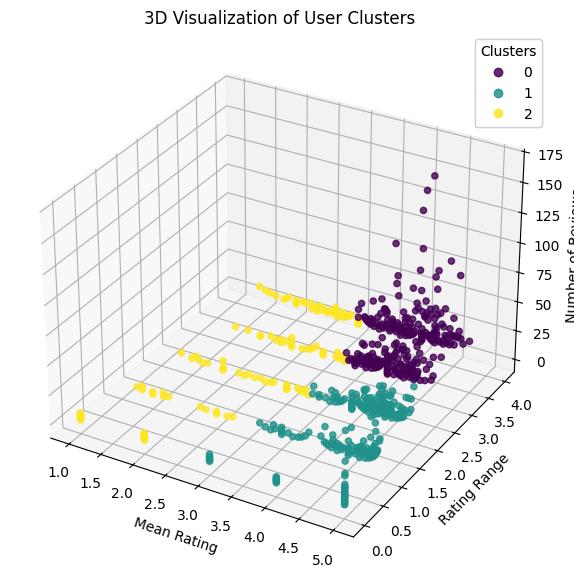

In [46]:
x = user_features['user_mean_rating']
y = user_features['user_rating_range']
z = user_features['num_reviews_per_user']
clusters = user_features['cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', alpha=0.8)

ax.set_title('3D Visualization of User Clusters')
ax.set_xlabel('Mean Rating')
ax.set_ylabel('Rating Range')
ax.set_zlabel('Number of Reviews')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="best")
ax.add_artist(legend1)

plt.show()